In [1]:
import numpy as np
import math as math
import matplotlib.pyplot as plt


Vamos a definir de varias maneras la solución al problema 
$$x^2 - 2 b x +1 =0.$$

Definimos
$$ x_+ = b - \sqrt{b^2-1},\quad x_+ = b - \sqrt{b^2-1},\quad \hat{x}_+ = 1/x_-,\quad \hat{x}_- = 1/x_+. $$


In [119]:
def xp(b):
    return b + np.sqrt(b**2-1)

def xm(b):
    return b - np.sqrt(b**2-1)

def xpinv(b):
    return 1/xm(b)

def xminv(b):
    return 1/xp(b)





Aquí calculamos los errores, esencialmente evaluando que nuestra raíz resuelva el problema. 

In [120]:
def errp(b):
    return (xp(b)**2-2*b*xp(b)+1)

def errm(b):
    return (xm(b)**2-2*b*xm(b)+1)

def errpinv(b):
    return xpinv(b)**2-2*b*xpinv(b)+1

def errminv(b):
    return xminv(b)**2-2*b*xminv(b)+1


Miremos como, al crecer $b$, se comportan los valores ingenuos tomados de la chicharronera:

In [121]:
for i in range(30):
    b = 1 +10**(i/3)
    print([xp(b),xm(b)]," con un error de ", [errp(b), errm(b)])

[3.732050807568877, 0.2679491924311228]  con un error de  [0.0, -4.440892098500626e-16]
[6.146166331352099, 0.16270304871166896]  con un error de  [0.0, -2.220446049250313e-16]
[11.19384284144999, 0.08933482577556617]  con un error de  [-1.4210854715202004e-14, -3.552713678800501e-15]
[21.954451150103324, 0.04554884989667762]  con un error de  [5.684341886080802e-14, 2.3314683517128287e-15]
[45.06650437161619, 0.022189429021477025]  con un error de  [0.0, -6.150635556423367e-14]
[94.82123051086735, 0.010546161388248265]  con un error de  [0.0, 1.0236256287043943e-13]
[201.99504938362077, 0.004950616379218786]  con un error de  [0.0, 3.3939517862791035e-13]
[432.8846279220369, 0.002310084340024332]  con un error de  [0.0, 4.296563105299356e-14]
[930.3166918197737, 0.0010749027817951173]  con un error de  [0.0, 1.2494338896829049e-11]
[2001.999500499376, 0.0004995006240733346]  con un error de  [4.656612873077393e-10, 1.0605749611869442e-10]
[4310.869148091987, 0.0002319717823411338]  co

Cuando nuestro argumento llega a $b=1+10^8$, las soluciones van a los valores erroneos $x_+ = 2 b, x_-= 0$. 

In [122]:
[xp(1+10**8),xm(1+10**8)]

[200000002.0, 0.0]

Con esto, el error explota

In [123]:
errp(1+10**8), errm(1+10**8)

(1.0, 1.0)

Miremos la misma dinámica para las soluciones $x_+, \hat{x}_-$.  El error en $\hat{x}_-$ nunca alcanza explota. Por supuesto, cuando nuestra representación de $b^2-1$ no puede distinguirse de $b$, la determinación de $x_+$ falla. 

In [125]:
for i in range(30):
    b = 1 + 10**(i/3)
    print([xp(b),xminv(b)]," con un error de ", [errp(b), errminv(b)])

[3.732050807568877, 0.2679491924311227]  con un error de  [0.0, 0.0]
[6.146166331352099, 0.16270304871166894]  con un error de  [0.0, 0.0]
[11.19384284144999, 0.08933482577556585]  con un error de  [-1.4210854715202004e-14, 0.0]
[21.954451150103324, 0.04554884989667773]  con un error de  [5.684341886080802e-14, 1.1102230246251565e-16]
[45.06650437161619, 0.02218942902147566]  con un error de  [0.0, 0.0]
[94.82123051086735, 0.010546161388249346]  con un error de  [0.0, 0.0]
[201.99504938362077, 0.004950616379220466]  con un error de  [0.0, 1.1102230246251565e-16]
[432.8846279220369, 0.002310084340024431]  con un error de  [0.0, 1.1102230246251565e-16]
[930.3166918197737, 0.0010749027818085476]  con un error de  [0.0, 1.1102230246251565e-16]
[2001.999500499376, 0.0004995006241263105]  con un error de  [4.656612873077393e-10, 0.0]
[4310.869148091987, 0.0002319717824055516]  con un error de  [0.0, 1.1102230246251565e-16]
[9285.177559527023, 0.00010769853280554163]  con un error de  [1.4901

In [127]:
for i in range(30):
    b = 1 + 10**(i/3)
    print([xpinv(b),xm(b)]," con un error de ", [errpinv(b), errm(b)])

[3.732050807568876, 0.2679491924311228]  con un error de  [-5.329070518200751e-15, -4.440892098500626e-16]
[6.146166331352097, 0.16270304871166896]  con un error de  [-1.4210854715202004e-14, -2.220446049250313e-16]
[11.193842841449952, 0.08933482577556617]  con un error de  [-4.263256414560601e-13, -3.552713678800501e-15]
[21.954451150103374, 0.04554884989667762]  con un error de  [1.1368683772161603e-12, 2.3314683517128287e-15]
[45.06650437161342, 0.022189429021477025]  con un error de  [-1.2460077414289117e-10, -6.150635556423367e-14]
[94.82123051087706, 0.010546161388248265]  con un error de  [9.204086381942034e-10, 1.0236256287043943e-13]
[201.99504938368932, 0.004950616379218786]  con un error de  [1.384614733979106e-08, 3.3939517862791035e-13]
[432.8846279220555, 0.002310084340024332]  con un error de  [8.032657206058502e-09, 4.296563105299356e-14]
[930.3166918313974, 0.0010749027817951173]  con un error de  [1.0813702829182148e-05, 1.2494338896829049e-11]
[2001.9995007117031, 0

/tmp/ipykernel_1350599/1045626023.py:8: RuntimeWarning: divide by zero encountered in scalar divide
  return 1/xm(b)
/tmp/ipykernel_1350599/425177849.py:8: RuntimeWarning: invalid value encountered in scalar subtract
  return xpinv(b)**2-2*b*xpinv(b)+1


Podemos mostrar algunas gráficas para evidenciar este fenómeno. 

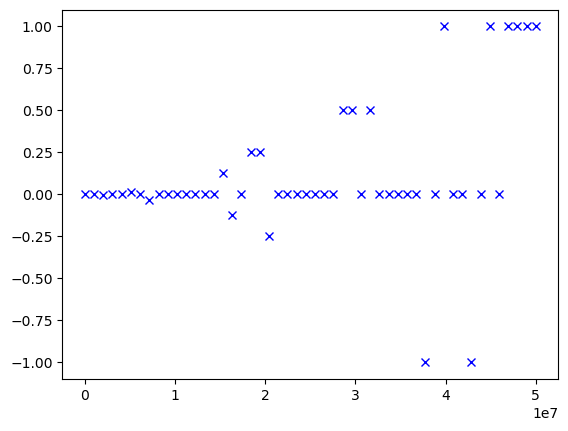

In [128]:
k= 7
B = np.linspace(1, 5*10**k)
errP = [errp(b) for b in B]
plt.plot(B, errP, 'bx')
plt.show()

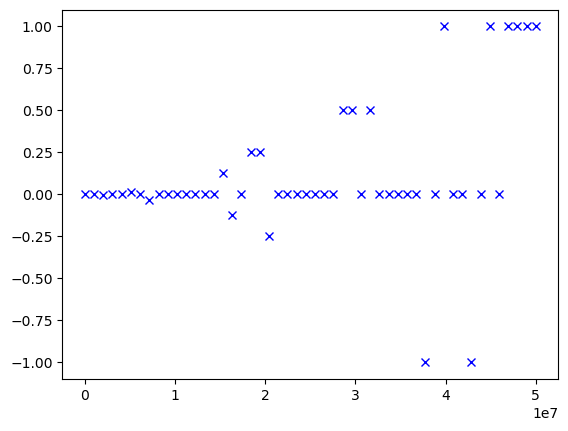

In [129]:
k= 7
B = np.linspace(1, 5*10**k)
errP = [errp(b) for b in B]
plt.plot(B, errP, 'bx')
plt.show()


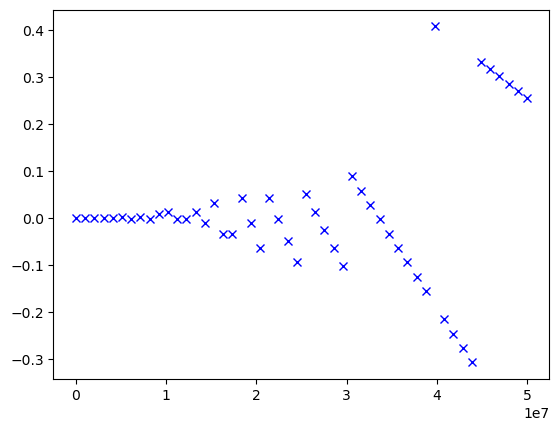

In [130]:
k= 7
B = np.linspace(1, 5*10**k)
errM = [errm(b) for b in B]
plt.plot(B, errM, 'bx')
plt.show()


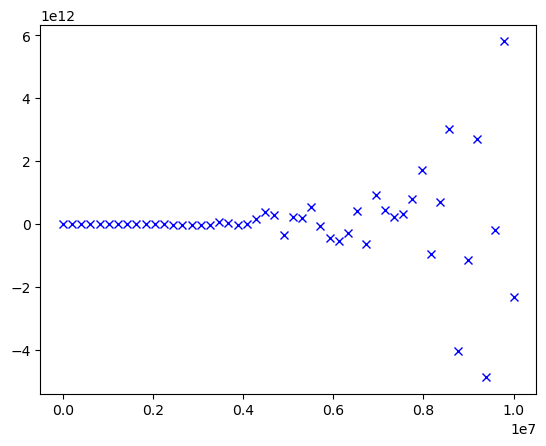

In [131]:
k= 7
B = np.linspace(1, 10**k)
errPi = [errpinv(b) for b in B]
plt.plot(B, errPi, 'bx')
plt.show()


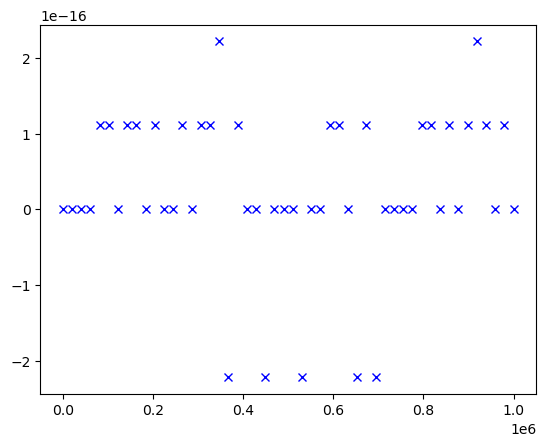

In [132]:
k= 6
B = np.linspace(1, 10**k)
errMi = [errminv(b) for b in B]
plt.plot(B, errMi, 'bx')
plt.show()